In [1]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt 
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('/Users/alyssa/Documents/FTW/Day_6/LAB/census.csv')

In [3]:
df = df.drop(['education_level'], axis = 1)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45222 entries, 0 to 45221
Data columns (total 13 columns):
age               45222 non-null int64
workclass         45222 non-null object
education-num     45222 non-null float64
marital-status    45222 non-null object
occupation        45222 non-null object
relationship      45222 non-null object
race              45222 non-null object
sex               45222 non-null object
capital-gain      45222 non-null float64
capital-loss      45222 non-null float64
hours-per-week    45222 non-null float64
native-country    45222 non-null object
income            45222 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 4.5+ MB


In [5]:
df['native-country'] = df['native-country'].astype(str)
df['native-country'] = df['native-country'].str.strip()

df['income'] = df['income'].astype(str)
df['income'] = df['income'].str.strip()

df['workclass'] = df['workclass'].astype(str)
df['workclass'] = df['workclass'].str.strip()

df['marital-status'] = df['marital-status'].astype(str)
df['marital-status'] = df['marital-status'].str.strip()

df['workclass'] = df['workclass'].astype(str)
df['workclass'] = df['workclass'].str.strip()

df['occupation'] = df['occupation'].astype(str)
df['occupation'] = df['occupation'].str.strip()

df['relationship'] = df['relationship'].astype(str)
df['relationship'] = df['relationship'].str.strip()

df['race'] = df['race'].astype(str)
df['race'] = df['race'].str.strip()

In [ ]:
df['workclass'].value_counts()

In [ ]:
df['marital-status'].value_counts()

In [ ]:
df['occupation'].value_counts()

In [ ]:
df['relationship'].value_counts()

In [ ]:
df['race'].value_counts()

In [ ]:
df['native-country'].value_counts()

In [6]:
df['native-country'].replace({'United-States': 'North America', 'Mexico': 'South America','Philippines': 'Asia', 
           'Germany': 'Europe','Puerto-Rico': 'South America', 'Canada':'North America',
           'El-Salvador': 'North America', 'India': 'Asia','Cuba': 'North America', 
           'England': 'Europe','China': 'Asia', 'Jamaica': 'North America', 'South': 'South America', 
           'Italy': 'Europe', 'Dominican-Republic': 'North America', 'Japan': 'Asia',
           'Guatemala': 'North America', 'Vietnam': 'Asia','Columbia': 'South America', 
           'Poland': 'Europe','Haiti': 'North America', 'Portugal': 'Europe',
           'Iran': 'Asia', 'Taiwan': 'Asia', 'Greece': 'Europe','Nicaragua': 'North America', 
           'Peru': 'South America','Ecuador': 'South America', 'France': 'Europe', 'Ireland': 'Europe',
           'Thailand': 'Asia', 'Hong': 'Asia', 'Cambodia': 'Asia','Trinadad&Tobago': 'South America',
           'Yugoslavia': 'Europe','Outlying-US(Guam-USVI-etc)': 'South America', 'Laos': 'Asia',
           'Scotland': 'Europe', 'Honduras': 'North America', 'Hungary': 'Europe','Holand-Netherlands': 'Europe'}, inplace=True)
df['native-country'].value_counts()

North America    42157
South America     1397
Asia               930
Europe             738
Name: native-country, dtype: int64

In [7]:
df.head()

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,North America,<=50K
1,50,Self-emp-not-inc,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,North America,<=50K
2,38,Private,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,North America,<=50K
3,53,Private,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,North America,<=50K
4,28,Private,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,North America,<=50K


In [8]:
df['income'].replace({'<=50K': 0, '>50K': 1}, inplace=True)

In [9]:
df.head()

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,North America,0
1,50,Self-emp-not-inc,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,North America,0
2,38,Private,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,North America,0
3,53,Private,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,North America,0
4,28,Private,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,North America,0


In [10]:
df['income'].value_counts()

0    34014
1    11208
Name: income, dtype: int64

In [11]:
features = ['age', 'workclass', 'education-num', 'marital-status', 'occupation', 'race', 'sex', 'native-country']
X = df[features]

In [12]:
X_temp = df[features]
X = pd.get_dummies(X_temp)

In [13]:
X.head()

,age,education-num,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,marital-status_Divorced,...,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_ Female,sex_ Male,native-country_Asia,native-country_Europe,native-country_North America,native-country_South America
0,39,13.0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,1,0,0,1,0
1,50,13.0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,1,0,0,1,0
2,38,9.0,0,0,1,0,0,0,0,1,...,0,0,0,1,0,1,0,0,1,0
3,53,7.0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
4,28,13.0,0,0,1,0,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0


In [14]:
y = df['income']

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
acc = logreg.score(X_test, y_test)
y_pred = logreg.predict(X_test)

In [21]:
acc

0.8289968305447041

In [22]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.92      0.89     10150
           1       0.71      0.55      0.62      3417

    accuracy                           0.83     13567
   macro avg       0.78      0.74      0.75     13567
weighted avg       0.82      0.83      0.82     13567



In [23]:
from sklearn.feature_selection import RFECV

In [24]:
correlated_features = set()
correlation_matrix = df.drop('income', axis=1).corr()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i,j]) > 0.8:
            colname = correlation_matrix.columns[i]
            correlated_features.add(columns)

In [25]:
rfc = RandomForestClassifier(random_state=101)
rfecv = RFECV(estimator=rfc, step=1, cv=StratifiedKFold(10), scoring='accuracy')
rfecv.fit(X, y)

RFECV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
      estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                       criterion='gini', max_depth=None,
                                       max_features='auto', max_leaf_nodes=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       n_estimators='warn', n_jobs=None,
                                       oob_score=False, random_state=101,
                                       verbose=0, warm_start=False),
      min_features_to_select=1, n_jobs=None, scoring='accuracy', step=1,
      verbose=0)

In [26]:
print('Optimal number of features: {}'.format(rfecv.n_features_))

Optimal number of features: 5


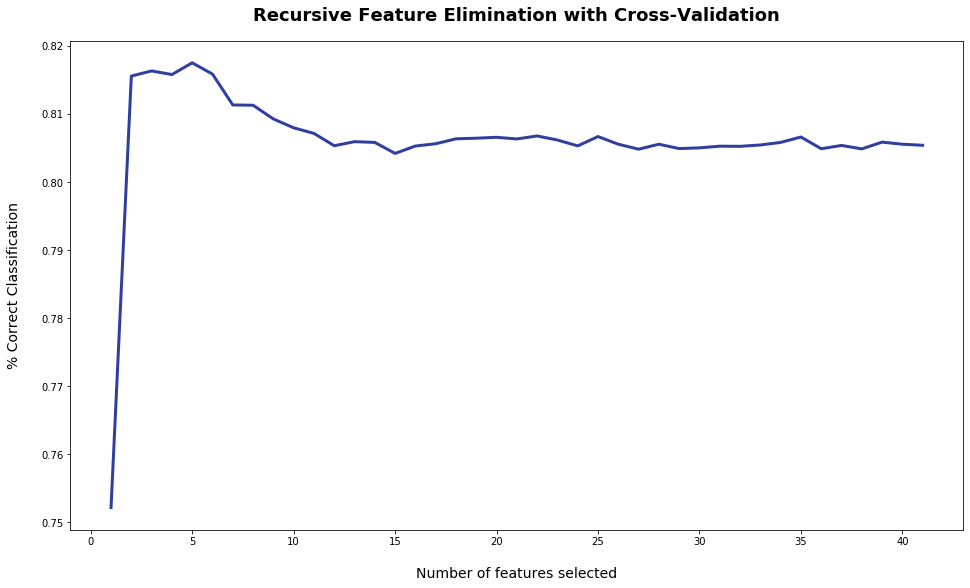

In [27]:
plt.figure(figsize=(16, 9))
plt.title('Recursive Feature Elimination with Cross-Validation', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Number of features selected', fontsize=14, labelpad=20)
plt.ylabel('% Correct Classification', fontsize=14, labelpad=20)
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_, color='#303F9F', linewidth=3)

plt.show()

In [28]:
rfecv.estimator_.feature_importances_

array([0.23500015, 0.31256687, 0.37339832, 0.05502323, 0.02401143])

In [31]:
print(np.where(rfecv.support_ == False)[0])

X.drop(X.columns[np.where(rfecv.support_ == False)[0]], axis=1, inplace=True)

[ 2  3  4  5  6  7  8  9 10 12 14 15 16 17 18 19 20 21 22 23 24 26 27 28
 29 30 31 32 33 34 35 36 37 38 39 40]


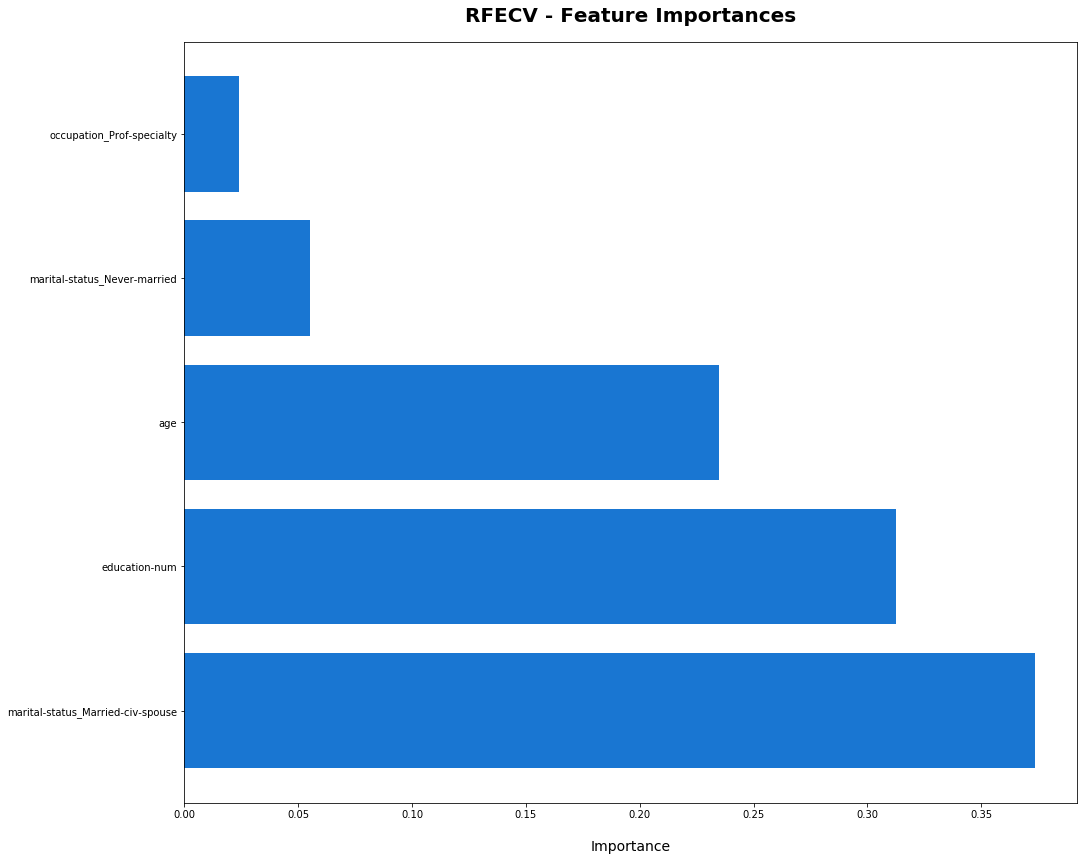

In [32]:
dset = pd.DataFrame()
dset['attr'] = X.columns
dset['importance'] = rfecv.estimator_.feature_importances_

dset = dset.sort_values(by='importance', ascending=False)


plt.figure(figsize=(16, 14))
plt.barh(y=dset['attr'], width=dset['importance'], color='#1976D2')
plt.title('RFECV - Feature Importances', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Importance', fontsize=14, labelpad=20)
plt.show()

In [36]:
features = ['marital-status_Married-civ-spouse', 'education-num', 'age', 'marital-status_Never-married', 'occupation_Prof-specialty']
Xrfe = X[features]
yrfe = df['income']

Xrfe_train, Xrfe_test, yrfe_train, yrfe_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [37]:
xgbmodel = XGBClassifier()
xgbmodel.fit(Xrfe_train, yrfe_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [39]:
yrfe_pred = xgbmodel.predict(Xrfe_test)
predictions = [round(value) for value in yrfe_pred]

In [40]:
accuracy = accuracy_score(yrfe_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 82.07%


In [35]:
df.columns

Index(['age', 'workclass', 'education-num', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'capital-gain', 'capital-loss',
       'hours-per-week', 'native-country', 'income'],
      dtype='object')

In [30]:
from sklearn.metrics import accuracy_score

In [41]:
xgbmodel = XGBClassifier()
xgbmodel.fit(X_train, y_train)
# make predictions for test data
y_pred = xgbmodel.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 83.59%


In [42]:
print(classification_report(yrfe_test, yrfe_pred))

              precision    recall  f1-score   support

           0       0.85      0.92      0.89     10150
           1       0.69      0.52      0.59      3417

    accuracy                           0.82     13567
   macro avg       0.77      0.72      0.74     13567
weighted avg       0.81      0.82      0.81     13567



In [43]:
from sklearn.model_selection import GridSearchCV
clf = LogisticRegression()
grid_values = {'penalty': ['l1', 'l2'],'C':[0.001,.009,0.01,.09,1,5,10,25]}
grid_clf_acc = GridSearchCV(clf, param_grid = grid_values,scoring = 'recall')
grid_clf_acc.fit(X_train, y_train)

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.001, 0.009, 0.01, 0.09, 1, 5, 10, 25],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='recall', verbose=0)

In [44]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.93      0.89     10150
           1       0.72      0.56      0.63      3417

    accuracy                           0.84     13567
   macro avg       0.79      0.75      0.76     13567
weighted avg       0.83      0.84      0.83     13567



In [45]:
xgbmodel = XGBClassifier()
xgbmodel.fit(X_train, y_train)
# make predictions for test data
y_pred = xgbmodel.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 83.59%


In [46]:
clf = LogisticRegression()
grid_values = {'penalty': ['l1', 'l2'],'C':[0.001,.009,0.01,.09,1,5,10,25]}
grid_clf_acc = GridSearchCV(clf, param_grid = grid_values,scoring = 'recall')
grid_clf_acc.fit(Xrfe_train, yrfe_train)

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.001, 0.009, 0.01, 0.09, 1, 5, 10, 25],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='recall', verbose=0)

In [47]:
xgbmodel = XGBClassifier()
xgbmodel.fit(Xrfe_train, yrfe_train)
# make predictions for test data
yrfe_pred = xgbmodel.predict(Xrfe_test)
predictions = [round(value) for value in yrfe_pred]
# evaluate predictions
accuracy = accuracy_score(yrfe_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 82.07%


In [48]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(Xrfe_train, yrfe_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1000,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [56]:
yrfepred = rf.predict(Xrfe_test)

In [64]:
acc1 = rf.score(Xrfe_test, yrfepred)

In [65]:
acc1

1.0